In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df_train = pd.read_csv("train_2015_2018.csv")
df_test = pd.read_csv("test_2019.csv")

In [3]:

#1df_train = df_train[df_train.str.contains==False]
columns = ['period', 'coordinate_x', 'coordinate_y', 'empty_net','last_coord_x', 'last_coord_y', 'last_period',
       'number_friendly', 'number_opposing',
       'power_play', 'distance', 'from_last_distance', 'angle', 'last_angle',
       'time_from_last', 'change_angle']

In [4]:
df_train

,Unnamed: 0,event_idx,period_time,period,game_id,team_away_name,team_home_name,is_goal,coordinate_x,coordinate_y,...,number_friendly,number_opposing,power_play,distance,from_last_distance,angle,last_angle,time_from_last,change_angle,speed
0,0,7,00:51,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-55.0,6.0,...,5,5,0,34.5254,154.275727,0.1747,1.4248,51,0.0000,0.000000
1,1,9,01:05,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-79.0,0.0,...,5,5,0,10.0000,50.477718,0.0000,0.4939,65,0.0000,0.000000
2,2,10,01:06,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-75.0,-1.0,...,5,5,0,14.0357,4.123106,0.0713,0.0000,6,0.0713,0.687184
3,3,13,01:53,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-55.0,-36.0,...,5,5,0,49.5177,79.605276,0.8140,1.5137,53,0.0000,0.000000
4,4,21,02:37,1,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-61.0,-1.0,...,5,5,0,28.0179,22.472205,0.0357,0.8330,37,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,332737,276,15:22,3,2015020001,Montréal Canadiens,Toronto Maple Leafs,1,-77.0,7.0,...,5,5,0,13.8924,33.600595,0.5281,0.8157,82,0.0000,0.000000
332738,332738,279,15:51,3,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-69.0,7.0,...,5,5,0,21.1896,36.013886,0.3367,0.9441,51,0.0000,0.000000
332739,332739,280,15:55,3,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,-65.0,-4.0,...,5,5,0,24.3311,11.704700,0.1651,0.3367,55,0.1716,0.212813
332740,332740,284,16:50,3,2015020001,Montréal Canadiens,Toronto Maple Leafs,0,42.0,3.0,...,5,5,0,47.0956,NaN,0.0637,NaN,50,0.0000,0.000000


In [5]:
df_test = df_test.fillna(0)
test_data = df_test[columns]
test_label = df_test['is_goal']

In [6]:
df_prep = df_train.fillna(0)
y = df_prep['is_goal']
X = df_prep[columns].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [7]:
X

,period,coordinate_x,coordinate_y,empty_net,last_coord_x,last_coord_y,last_period,number_friendly,number_opposing,power_play,distance,from_last_distance,angle,last_angle,time_from_last,change_angle
0,1.0,-55.0,6.0,0.0,94.0,-34.0,1.0,5.0,5.0,0.0,34.5254,154.275727,0.1747,1.4248,51.0,0.0000
1,1.0,-79.0,0.0,0.0,-37.0,-28.0,1.0,5.0,5.0,0.0,10.0000,50.477718,0.0000,0.4939,65.0,0.0000
2,1.0,-75.0,-1.0,0.0,-79.0,0.0,1.0,5.0,5.0,0.0,14.0357,4.123106,0.0713,0.0000,6.0,0.0713
3,1.0,-55.0,-36.0,0.0,-91.0,35.0,1.0,5.0,5.0,0.0,49.5177,79.605276,0.8140,1.5137,53.0,0.0000
4,1.0,-61.0,-1.0,0.0,-69.0,-22.0,1.0,5.0,5.0,0.0,28.0179,22.472205,0.0357,0.8330,37.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332737,3.0,-77.0,7.0,0.0,-57.0,34.0,3.0,5.0,5.0,0.0,13.8924,33.600595,0.5281,0.8157,82.0,0.0000
332738,3.0,-69.0,7.0,0.0,-68.0,-29.0,3.0,5.0,5.0,0.0,21.1896,36.013886,0.3367,0.9441,51.0,0.0000
332739,3.0,-65.0,-4.0,0.0,-69.0,7.0,3.0,5.0,5.0,0.0,24.3311,11.704700,0.1651,0.3367,55.0,0.1716
332740,3.0,42.0,3.0,0.0,0.0,0.0,3.0,5.0,5.0,0.0,47.0956,0.000000,0.0637,0.0000,50.0,0.0000


In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266193, 16)
(266193,)
(66549, 16)
(66549,)


# Feature_Selection

In [9]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

In [10]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)
model_s = SelectFromModel(lsvc)

clf = Pipeline([('var', VarianceThreshold()),('scaler', StandardScaler()),
  ('feature_selection', model_s)
])

X_new = clf.fit_transform(X,y)
X_new.shape

X_train_s = clf.transform(X_train)
print(X_train_s.shape)
X_train_s = clf.transform(X_test)

(266193, 15)


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

In [12]:
skb = SelectKBest(f_classif, k = 10)
clf = Pipeline([('var', VarianceThreshold()),('scaler', StandardScaler()),('skb', skb)])

X_new = clf.fit_transform(X,y)
X_new.shape

X_train_10 = clf.transform(X_train)
print(X_train_10.shape)
X_test_10 = clf.transform(X_test)

(266193, 10)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=0.913):
{'C': 0.046415888336127774}


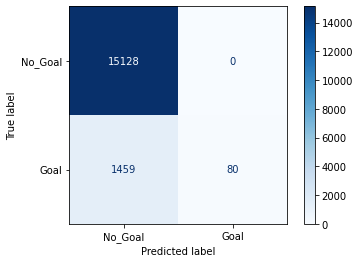

In [17]:
logistic = LogisticRegression(max_iter=10000, tol=0.1)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "C": np.logspace(-4, 4, 4),
}
search_logR = GridSearchCV(logistic, param_grid, n_jobs=-1, verbose=2)
search_logR.fit(X_train_10, y_train)
#save
#dump(search_logR, './models/Q6logR_s.joblib')

#load
#search_logR = load('./models/Q6logR_s.joblib')

print("Best parameter (CV score=%0.3f):" % search_logR.best_score_)
print(search_logR.best_params_)

ConfusionMatrixDisplay.from_estimator(search_logR, X_test_10, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [74]:
search_logR.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9075363014520581

# Logistic Regression 

In [35]:
pca = PCA()
X_train = StandardScaler().fit_transform(X_train)
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
print(len(explained_variance))
print(sum(explained_variance[0:15]))

16
1.0


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best parameter (CV score=0.911):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 13}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


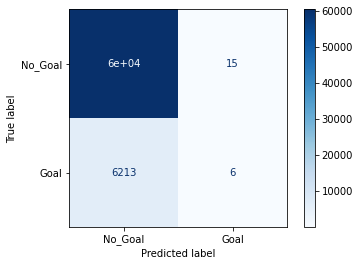

In [36]:
pca = PCA()
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)

pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", pca), ("logistic", logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [7 ,10, 11,13],
    "logistic__C": np.logspace(-4, 4, 4),
}

search_logR = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=10)
search_logR.fit(X_train, y_train)
#save
#dump(search_logR, './models/Q6logR_s.joblib')

#load
#search_logR = load('./models/Q6logR_s.joblib')

print("Best parameter (CV score=%0.3f):" % search_logR.best_score_)
print(search_logR.best_params_)

# print(search.score(X_test, y_test))
# y_pred = search.predict(X_test)
# explained_variance = pca.explained_variance_ratio_
# print(len(explained_variance))
# print(sum(explained_variance[0:85]))

ConfusionMatrixDisplay.from_estimator(search_logR, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [37]:
search_logR.score(test_data,test_label)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9034887026683093

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


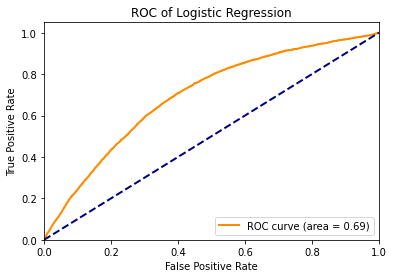

In [38]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_logR.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression")
plt.legend(loc="lower right")


plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


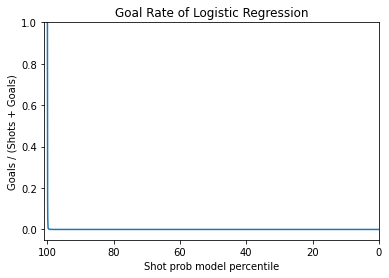

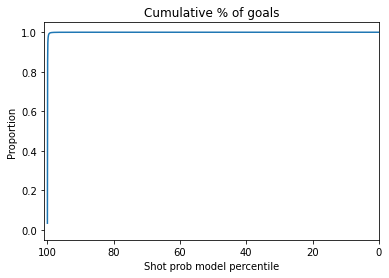

In [45]:
#model percentile
lr_probs = search_logR.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.05, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression")
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.05, 1.05])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.show()

In [40]:
from sklearn.calibration import CalibrationDisplay

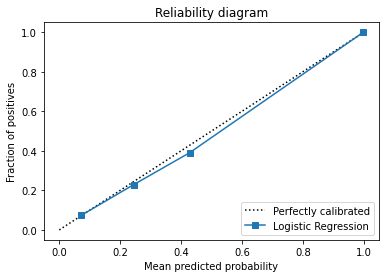

In [41]:
disp = CalibrationDisplay.from_estimator(search_logR, X_train, y_train, name='Logistic Regression')
plt.title("Reliability diagram")
plt.show()

# SVC

In [13]:
from sklearn.svm import SVC

0.9100512404393755


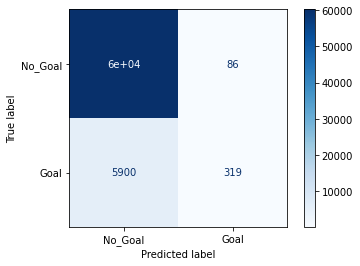

In [15]:
from sklearn.svm import SVC

search_svc = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 15)), ("svc", SVC(kernel='rbf',C=10))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
# param_grid = {'svc__kernel':('linear','rbf'), 
#                'svc__C':[1, 10]}


# search_svc = GridSearchCV(pipe, param_grid, n_jobs=-1,verbose=2)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=0)

search_svc.fit(X_test_svm, y_test_svm)
# print("Best parameter (CV score=%0.3f):" % search_svc.best_score_)
# print(search_svc.best_params_)

# print("Grid scores on development set:")
# print()
# means = search_svc.cv_results_['mean_test_score']
# stds = search_svc.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, search_svc.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
print(search_svc.score(X_test, y_test))
ConfusionMatrixDisplay.from_estimator(search_svc, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [17]:
search_svc.score(test_data,test_label)

0.907468829111782

In [28]:
lr_probs = search_svc.predict(X_test)
lr_probs

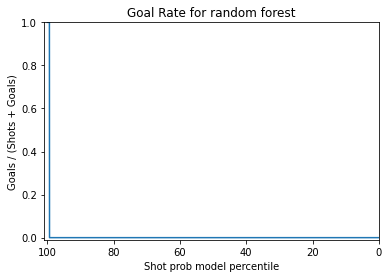

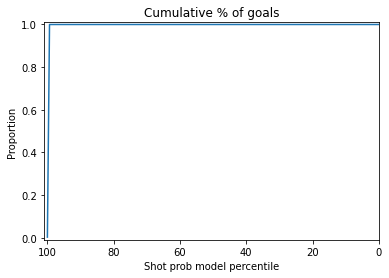

In [29]:
#model percentile
#lr_probs = search_svc.predict(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate for random forest")
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.01])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.show()

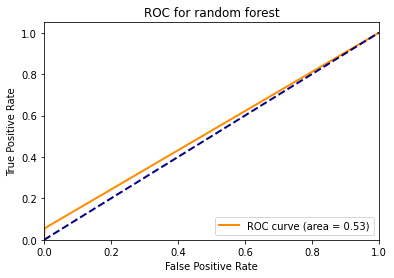

In [30]:
from sklearn.metrics import roc_curve, auc

y_score = search_svc.predict(X_train)
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for random forest")
plt.legend(loc="lower right")


plt.show()

In [34]:
disp = CalibrationDisplay.from_estimator(search_svc, X_train, y_train, name='SVC ')
plt.title("Reliability diagram")
plt.show()

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6034951689732377


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


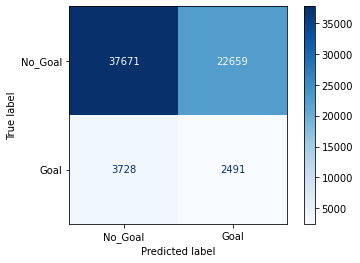

In [48]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators = 200, max_features = 'sqrt', oob_score = True) 

search_rf = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 13)), ("rfc",rfc)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
# param_grid = { 
#     'rfc__n_estimators': [200, 500],
#     'rfc__max_features': ['sqrt', 'log2']
# }

# search_rf = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1,verbose=12)
# search_rf.fit(X_train, y_train)
# print("Best parameter (CV score=%0.3f):" % search_rf.best_score_)
# print(search_rf.best_params_)

# print("Grid scores on development set:")
# print()
# means = search_rf.cv_results_['mean_test_score']
# stds = search_rf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, search_rf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))


#X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=0)

search_rf.fit(X_train, y_train)

print(search_rf.score(X_test, y_test))
ConfusionMatrixDisplay.from_estimator(search_rf, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

In [53]:
search_rf.score(test_data,test_label)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6106380386370097

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


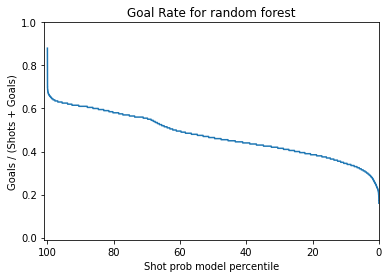

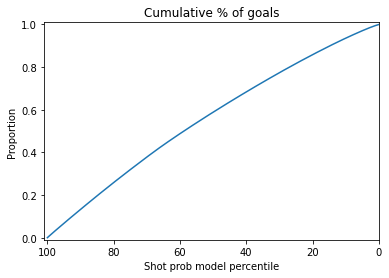

In [54]:
#model percentile
lr_probs = search_rf.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate for random forest")
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.01])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.show()

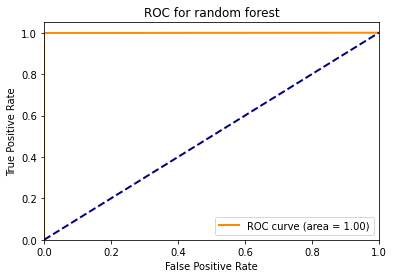

In [55]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_rf.predict(X_train)
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for random forest")
plt.legend(loc="lower right")


plt.show()

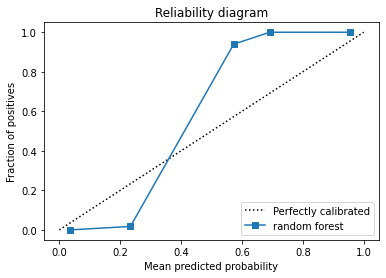

In [56]:
disp = CalibrationDisplay.from_estimator(search_rf, X_train, y_train, name='random forest ')
plt.title("Reliability diagram")
plt.show()

# ada boost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameter (CV score=0.911):
{'ada__learning_rate': 0.01, 'ada__n_estimators': 10}
Grid scores on development set:

0.911 (+/-0.001) for {'ada__learning_rate': 0.01, 'ada__n_estimators': 10}
0.911 (+/-0.001) for {'ada__learning_rate': 0.01, 'ada__n_estimators': 12}
0.911 (+/-0.001) for {'ada__learning_rate': 0.01, 'ada__n_estimators': 15}
0.911 (+/-0.001) for {'ada__learning_rate': 0.1, 'ada__n_estimators': 10}
0.911 (+/-0.001) for {'ada__learning_rate': 0.1, 'ada__n_estimators': 12}
0.911 (+/-0.001) for {'ada__learning_rate': 0.1, 'ada__n_estimators': 15}
0.911 (+/-0.002) for {'ada__learning_rate': 1, 'ada__n_estimators': 10}
0.911 (+/-0.001) for {'ada__learning_rate': 1, 'ada__n_estimators': 12}
0.911 (+/-0.001) for {'ada__learning_rate': 1, 'ada__n_estimators': 15}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


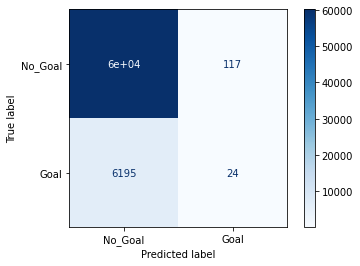

In [58]:
ada = AdaBoostClassifier()

pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 14)), ("ada",ada)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = { 
    'ada__n_estimators': [10,12,15],
    'ada__learning_rate': [0.01,0.1,1]
}


search_ada = GridSearchCV(pipe, param_grid, n_jobs=-1,verbose=10)
search_ada.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_ada.best_score_)
print(search_ada.best_params_)


means = search_ada.cv_results_['mean_test_score']
stds = search_ada.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search_ada.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

ConfusionMatrixDisplay.from_estimator(search_ada, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


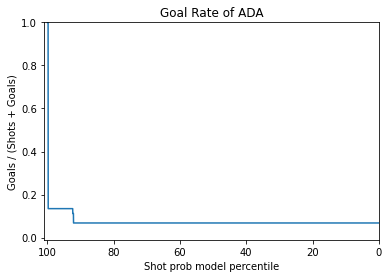

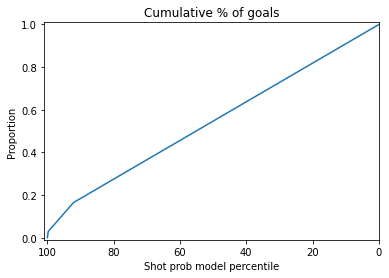

In [59]:
#model percentile
lr_probs = search_ada.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of ADA")
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.01])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.show()

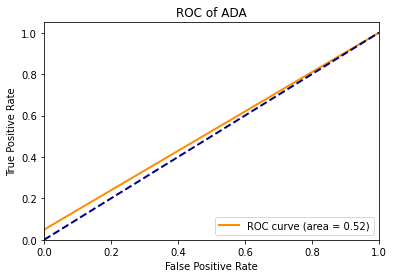

In [60]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_ada.predict(X_train)
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of ADA")
plt.legend(loc="lower right")


plt.show()

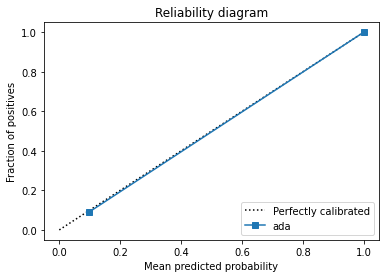

In [61]:
disp = CalibrationDisplay.from_estimator(search_ada, X_train, y_train, name='ada')
plt.title("Reliability diagram")
plt.show()

In [62]:
search_ada.score(test_data,test_label)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9023921372195974

# NN

In [63]:
from sklearn.neural_network import MLPClassifier

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Iteration 1, loss = 0.29359198
Validation score: 0.911683
Iteration 2, loss = 0.27131916
Validation score: 0.911683
Iteration 3, loss = 0.27025986
Validation score: 0.911683
Iteration 4, loss = 0.26985186
Validation score: 0.911683
Iteration 5, loss = 0.26954719
Validation score: 0.911683
Iteration 6, loss = 0.26932386
Validation score: 0.911683
Iteration 7, loss = 0.26924772
Validation score: 0.911683
Iteration 8, loss = 0.26912361
Validation score: 0.911683
Iteration 9, loss = 0.26905569
Validation score: 0.911683
Iteration 10, loss = 0.26895186
Validation score: 0.911683
Iteration 11, loss = 0.26892833
Validation score: 0.911683
Iteration 12, loss = 0.26883389
Validation score: 0.911683
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Best parameter (CV score=0.911):
{'mlp__hidden_layer_sizes': (20, 20, 20)}
Grid scores on development set:

0.911 (+/-0.001) for {'mlp__hidden_layer

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


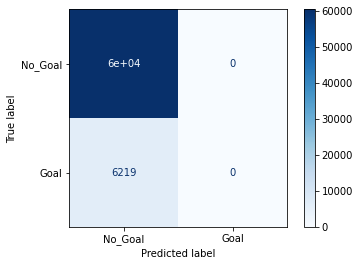

In [64]:
mlp = MLPClassifier(batch_size=500, activation = 'relu', learning_rate='adaptive', max_iter=200, verbose=True,  early_stopping=True)


pipe = Pipeline(steps=[('scaler', StandardScaler()), ("pca", PCA(n_components = 13)), ("mlp",mlp)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
parameter_space = {
    'mlp__hidden_layer_sizes': [(60,60),(20,20,20),(100,100),(200)],
}


search_mlp = GridSearchCV(pipe, parameter_space, n_jobs=-1, verbose=10)
search_mlp.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_mlp.best_score_)
print(search_mlp.best_params_)

print("Grid scores on development set:")
print()
means = search_mlp.cv_results_['mean_test_score']
stds = search_mlp.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search_mlp.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

ConfusionMatrixDisplay.from_estimator(search_mlp, X_test, y_test,
                                display_labels=['No_Goal','Goal'],
                                cmap=plt.cm.Blues)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


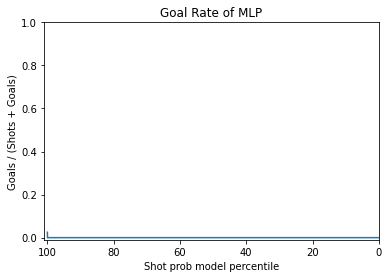

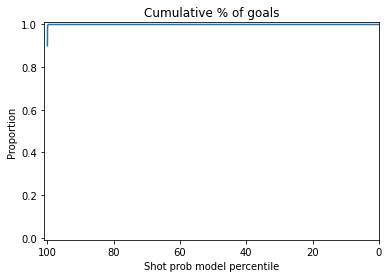

In [65]:
#model percentile
lr_probs = search_mlp.predict_proba(X_test)
n = len(lr_probs)
x_axis = np.arange(n)[::-1]*(100/n)
#print(x_axis)

# print(lr_probs)
lr_probs_y = lr_probs[:, 1]
lr_probs_y[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
lr_probs_y_sum = np.cumsum(lr_probs_y)
#lr_probs_x = ((sum(lr_probs_y)-lr_probs_y_sum[:])/sum(lr_probs_y))*100

#print(lr_probs_y_sum)
#goal rate

plt.figure()
plt.plot(
    x_axis,
    lr_probs_y,
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of MLP")
plt.show()

#cumulative plot
plt.figure()
ax = plt.plot(
    x_axis,
    lr_probs_y_sum/sum(lr_probs_y),
)
plt.xlim([101, 0])
plt.ylim([-0.01, 1.01])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.show()

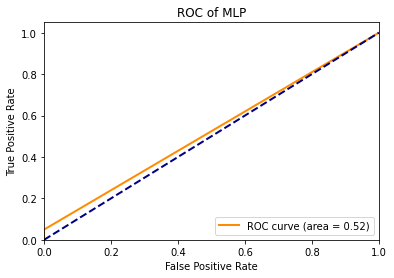

In [66]:
#plot roc
from sklearn.metrics import roc_curve, auc

y_score = search_mlp.predict(X_train)
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of MLP")
plt.legend(loc="lower right")


plt.show()

In [67]:
search_mlp.score(test_data,test_label)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.9035834675836301

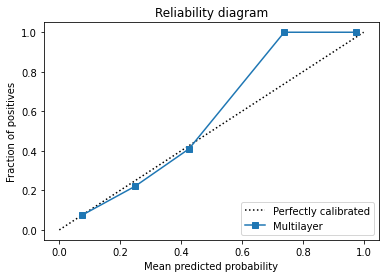

In [68]:
disp = CalibrationDisplay.from_estimator(search_mlp, X_train, y_train, name='Multilayer')
plt.title("Reliability diagram")
plt.show()